# Oxygen Abundance 

### In this notebook,  I will show how to measure the oxygen abundance 12+Log(O/H).  


### The direct method use the collitional excitation lines [OIII]$\lambda\lambda$4959,5007, [OIII]$\lambda\lambda$3726,3729 and temerature sensitive [OIII] $\lambda$4363 verse the Balmer line H$\beta$ to measure O$^{++}$/H and O$^+$/H.  

### The Strong line calibration method (I personally think strong line estimation is a proper name) is an empirical approximation using only the brighter emission lines ([OIII]$\lambda\lambda$4959,5007, H$\beta$, etc.)  

### I will use the emissitivty library package PyNeb some of the calculation, and occassionally defined function for the propose of interest.  PyNeb actually has everything encoded,  but I think it's nice to work with some handy equations. 

In [1]:
## Packages 

import numpy as np
import matplotlib.pyplot as plt 
import pyneb as pn 

In [8]:
# PyNeb

# Atom
H1 = pn.RecAtom('H',1)
O2 = pn.Atom('O',2)
O3 = pn.Atom('O',3)

#Emission lines 
class em:
    def __init__(self, tem, den):
        self.Hb = H1.getEmissivity(tem=tem, den=den, lev_i = 4, lev_j = 2)  
        # wavelength is 4861 AA, in case you forget

        self.OIII5007 = O3.getEmissivity(tem=tem, den=den, wave=5007)
        self.OIII4959 = O3.getEmissivity(tem=tem, den=den, wave=5007)
        self.OIII4363 = O3.getEmissivity(tem=tem, den=den, wave=4363)

        self.OII1 = O2.getEmissivity(tem=tem, den=den, wave=3726)
        self.OII2 = O2.getEmissivity(tem=tem, den=den, wave=3729)
        self.OII3727 = self.OII1 + self.OII2

In [6]:
# function 
def near_idx(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx  


#def temp(OIII, OIII4363):
def temp(f):
    #f = OIII/OIII4363
    T3space = np.arange(1e4, 2.2e4, 100)
    # Izotov 2006
    f3space = 7.9*np.exp(3.29e4/T3space)/(1+4.5e-4*100/np.sqrt(T3space))
    #f3space = (7840 - 1.357*f + 48.44/f)
    T3 = T3space[near_idx(f3space, f)]
    return T3


### Plot style 
def plotstyle():
    plt.xlabel('xlabel',  fontsize = 20)
    plt.ylabel('ylabel',  fontsize = 20)

    plt.xticks(size=18)
    plt.yticks(size=18)
    
    
def axstyle(ax):
    ax.set_xlabel('xlabel',  fontsize = 20)
    ax.set_ylabel('ylabel',  fontsize = 20)

    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

## Electron temperature T$e$(OIII)

### First we will show how electron temperature T$_e$(OIII) changes with the (OIII5007+OIII4959)/OIII4363 line ratio.  

### In practice,  you'll be using the dust extinction corrected line ratio from your spectrum to find the nearest corresponding temerature, or you can use fitting function (as the above function), PyNeb also have a funciton "getTemDen". 

### Electron density between 1e3 and 1e4 affects very little on the line ratio.  Typically studies just assume the electron density as 100 cm$^{-3}$ in the HII region. 

#### Keep in mind that OIII5007 = 2.98 $\times$ OIII4959 

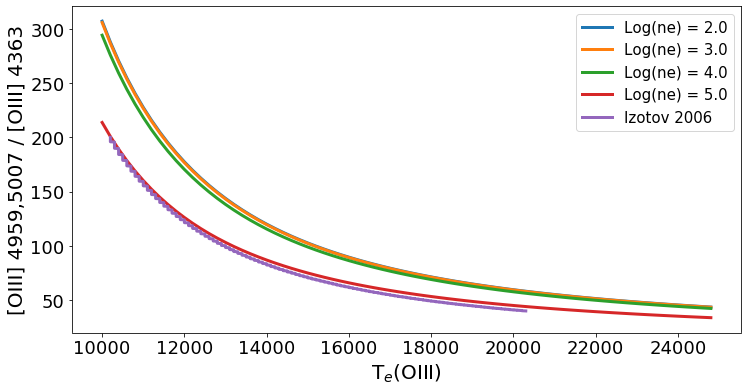

In [9]:
tem = np.arange(1e4, 2.5e4, 200) 
dens = np.geomspace(1e2, 1e5, 4)  # log scale 



fig, ax = plt.subplots(figsize = (12, 6))
plotstyle()

x = tem

for i in dens: 
    L = em(tem, den=i)
    x = tem
    y = (L.OIII5007+L.OIII4959)/(L.OIII4363)
    ax.plot(x, y,lw=3, label = f'Log(ne) = {np.log10(i)}')
    
## the femp function    
y = np.arange(40, 200, 0.1)
x = [ temp(i) for i in y] 
plt.plot(x, y, lw = 3, label = 'Izotov 2006')

plt.xlabel(r'T$_e$(OIII)')
plt.ylabel(r'[OIII] 4959,5007 / [OIII] 4363')
plt.legend(fontsize=15)
plt.show()

## Electron temperature T$e$(OII)

### One can use the forbidden [OII] line ratio [OII] $\lambda\lambda$ 3726,3729 / [OII] $\lambda\lambda$ 7319,7330 to measure the T$e$(OII).   However, the line ratio is strongly dependence the electron density, and oftenly we don't have good S/N detection on both lines.  (Even with low redshift, [OII] $\lambda$ 7319 can easily fall out of the optical window) 

### It is common to use the T$e$(OIII) to approximate the T$e$(OII). 


#### notation: t = T $\times$ 10$^{-4}$

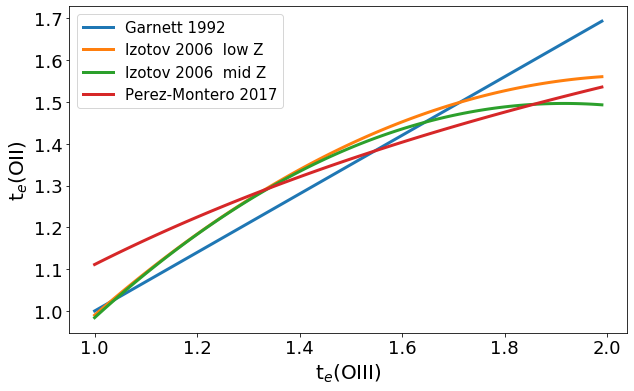

In [10]:
## Several different T(OII) approximation: 
## All in the unit of 1000 K 

# Garnett 1992 
t2 = lambda t3: 0.7*t3+0.3 

# Izotov 2006,  low Z (~7.2)
t2_lowZ = lambda t3: -0.577 +t3*(2.065-0.498*t3)
# Izotov 2006,  low Z (~7.6)
t2_midZ = lambda t3: -0.744 +t3*(2.338-0.610*t3)

# Perez-Montero 2017
t2_P2017 = lambda t3: 2/(1/t3 + 0.8) 


T3 = np.arange(1e4, 2e4, 100)


fig, ax = plt.subplots(figsize = (10, 6))
plotstyle()


x = T3*1e-4
ax.plot(x, t2(x), lw=3,label = 'Garnett 1992')
ax.plot(x, t2_lowZ(x),lw=3, label = 'Izotov 2006  low Z')
ax.plot(x, t2_midZ(x), lw=3,label = 'Izotov 2006  mid Z')
ax.plot(x, t2_P2017(x), lw=3,label = 'Perez-Montero 2017')



plt.xlabel(r't$_e$(OIII)')
plt.ylabel(r't$_e$(OII)')
plt.legend(fontsize=15)
plt.show()

## Oxygen Abundance with Direct Method 

### The intensity of the collisional excitation lines is the frequency of the collision between the atom and the electron,  which depends on Einstein coefficients, electron density, atom density and their velocities.  When we are calculating the Oxygen abundance relative to Hydrogen, the electron density is approximately the same as the H$^+$ (proton) density, and the electron velocity dominates the collisional event due to the lower mass.    

### We can have: 

$$
\frac{I([OIII]4959,5007}{I(H\beta)} = \frac{n_e n(OIII) k_{03}(T_e) E_{32}A_{32}/(A_{31}+A{32}) }{ n_e n(H^+) \alpha_{eff}(Te) E_{H\beta}}, 
$$
### where 
$$
k_{03}(Te) = 8.63\times 10^{-8} \frac{\Omega_{03}}{g_0} t^{-0.5} exp(-E_{30}/kT) 
$$
### which is a collisional coefficient. 

### The point is,  we have the Oxygen density ratio: 
$$
\frac{n(OIII)}{n(H^{+})} = A_0 \frac{I[OIII]4959,5007}{I(H\beta)} t^{B_0} exp(-C_0~t)
$$
### with some constant $A_0, B_0, C_0$.  Similarly,  we can expect the a formula for OII.  

### Once we have the relative abundance of O$^{+}$ and O$^{++}$, we can assume 
$$
\frac{O}{H} = \frac{O^+}{H} + \frac{O^{++}}{H} 
$$
### Since Oxygen  has similar ionization energy has Hygroden, Oxygen should all be ionized in the HII region, and O$^{+++}$ is very rare (<1%) in the HII region at that temperature range (< 20000 K ). 

In [11]:
## Izotov 2006 
def OA(Hb, OII, OIII, t3):  #def OA(R2, R3, t3):
    # t3 is in the unit of 1e4 K 
    R2 = OII/Hb
    R3 = OIII/Hb
    t2 = 0.7*t3+0.3
    logO1H = -12 + np.log10(R2) + 5.961 + 1.672/t2 -0.40*np.log10(t2) - 0.034*t2
    logO2H = -12 + np.log10(R3) + 6.200 + 1.251/t3 - 0.55*np.log10(t3) - 0.014*t3  
    
    Oa = 12+np.log10(10**(logO1H)+10**(logO2H))
    return Oa

def OA_ratio(R2, R3, t3): 
    t2 = t2_midZ(t3) 
    logO1H = -12 + np.log10(R2) + 5.961 + 1.672/t2 -0.40*np.log10(t2) - 0.034*t2
    logO2H = -12 + np.log10(R3) + 6.200 + 1.251/t3 - 0.55*np.log10(t3) - 0.014*t3  
    
    Oa = 12+np.log10(10**(logO1H)+10**(logO2H))
    return Oa

## Stong Line Calibration

### Since [OIII]4363 is faint, Strong Line calibration use the empirical law between direct method and bright emission line ratio of the know HII region to approximate the Oxygen abundance.  

### Here we define the line ratio: 

$$
R23 = \frac{I(OIII)4959,5007 + I(OII)3726,3729}{H\beta}, \\
O32= \frac{I(OIII)4959,5007}{I(OII)3726,3729}
$$

### The function in Maiolino et al. 2008 are given as Log(R) = f(Z),  
### where R is the line ratio, Z = 12+(O/H) - 8.69   (relative to the solar abundance) 


### The physics behind this approximation is again the temperature.  The abundace affects the cooling function of the HII region, which reflect on the temerature and O$^{++}$/O$^{+}$.  An intrinsic scattering of this approximation is expected,  but such scattering $\sigma$ depends on the objects from which we fit the relation.   Maiolino et al. 2008 use the effect of dust extinction $A_V$ as the 1$\sigma$ uncertainty. 

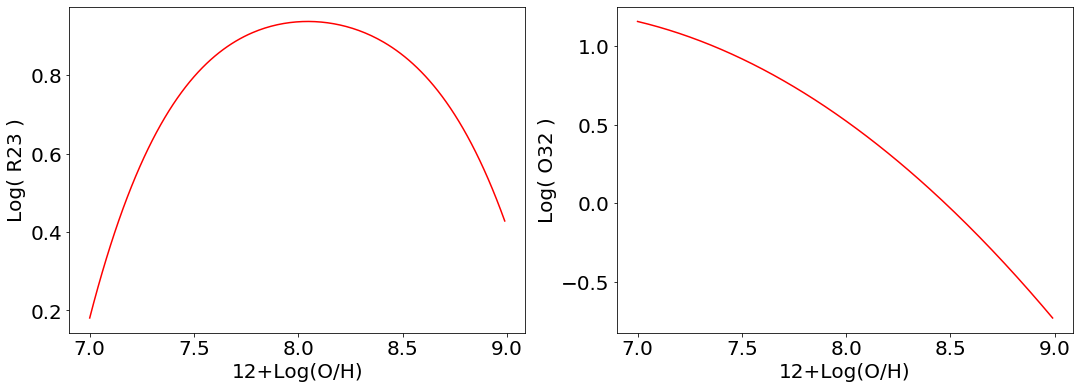

In [12]:
x = np.arange(7,9, 1e-2)

fig = plt.figure( figsize = (18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axstyle(ax1); axstyle(ax2)

y1 = lambda x:  0.7462-0.7149*x-0.9401*x**2-0.6154*x**3-0.2524*x**4
ax1.plot(x, y1(x-8.69), color='r', label='Maiolino 2008')

ax1.set_xlabel('12+Log(O/H)')
ax1.set_ylabel('Log( R23 )')


y2 = lambda x:  -0.2839 -1.3881*x -0.3172*x**2
ax2.plot(x, y2(x-8.69), color='r', label='Maiolino 2008')
ax2.set_xlabel('12+Log(O/H)')
ax2.set_ylabel('Log( O32 )')
plt.show()

##  Discussion 

### 1. On the temperature 

There are several thoughts about the temperature.  Firstly, one simple way to obtain strong line calibration is to assume Te = 10000K or 15000K, and apply to the direct method. Secondly, does the t2 and t3 relation makes any difference on 12+Log(O/H)? Here we explore the effects of the temperatures to the determination of the Oxygen Abundance. 

For simplicity, we plot the R2 (OII3727/H$\beta$) vs 12+Log(O/H), and R3 (OIII5007/H$\beta$) vs 12+Log(O/H) separately.  It is more realistic and proper to set ionization field, abundance, ionization paramter (e.g. using Cloudy) for a consistent model.  What we are doing here is to have an idea of what we may end up if we make an mistake on the measurement on the spectrum. 



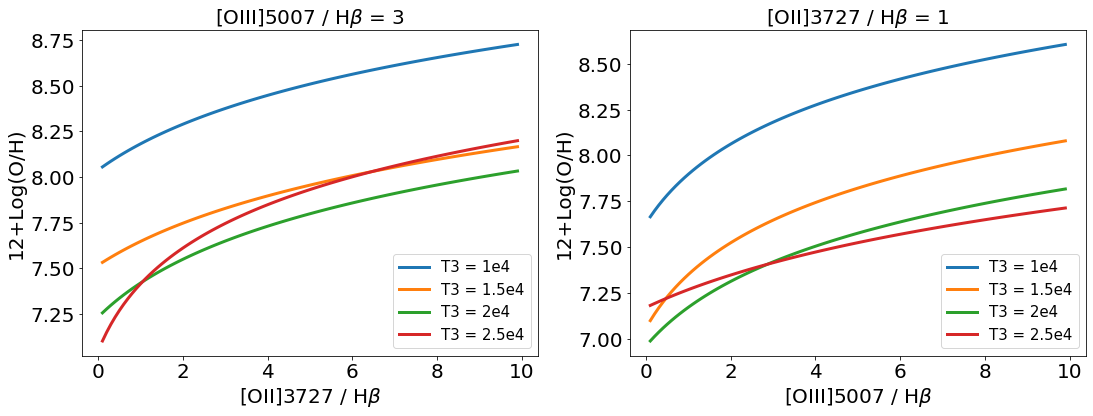

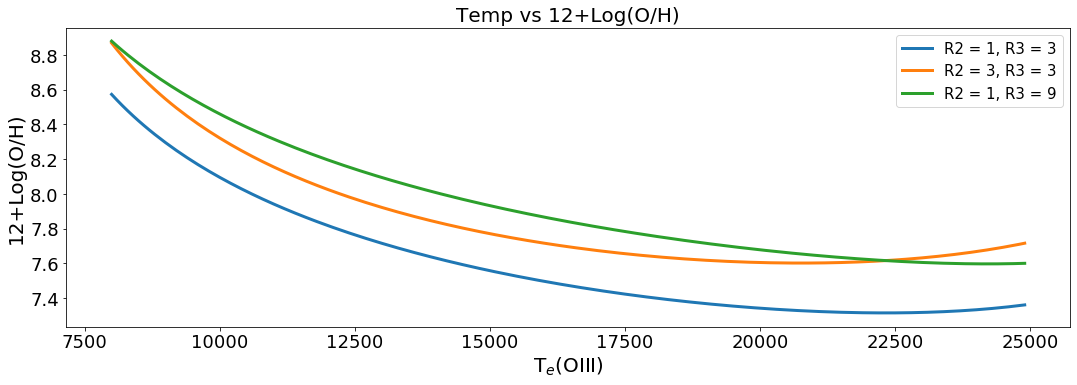

In [13]:
R2 = np.arange(0.1, 10, 1e-1)
R3 = np.arange(0.1, 10, 1e-1)

fig = plt.figure( figsize = (18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
axstyle(ax1); axstyle(ax2)

x = R2 
y = lambda t3 : OA_ratio(R2, 3*1.33, t3 )
ax1.plot(x, y(1)  , lw=3, label = 'T3 = 1e4')
ax1.plot(x, y(1.5), lw=3, label = 'T3 = 1.5e4')
ax1.plot(x, y(2)  , lw=3, label = 'T3 = 2e4')
ax1.plot(x, y(2.5), lw=3, label = 'T3 = 2.5e4')

ax1.set_xlabel(r'[OII]3727 / H$\beta$')
ax1.set_ylabel('12+Log(O/H)')
ax1.set_title(r'[OIII]5007 / H$\beta$ = 3', fontsize = 20)



x = R3

y = lambda t3 : OA_ratio(1, R3*1.33, t3 )
ax2.plot(x, y(1)  , lw=3, label = 'T3 = 1e4')
ax2.plot(x, y(1.5), lw=3, label = 'T3 = 1.5e4')
ax2.plot(x, y(2)  , lw=3, label = 'T3 = 2e4')
ax2.plot(x, y(2.5), lw=3, label = 'T3 = 2.5e4')

ax2.set_xlabel(r'[OIII]5007 / H$\beta$')
ax2.set_ylabel('12+Log(O/H)')
ax2.set_title(r'[OII]3727 / H$\beta$ = 1', fontsize = 20)


ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
plt.show()


tem = np.arange(0.8, 2.5, 0.01)
plt.figure( figsize = (18, 5.5))
plotstyle()

plt.plot( tem*1e4, OA_ratio(1, 3, tem), lw=3, label='R2 = 1, R3 = 3' )

plt.plot( tem*1e4, OA_ratio(3, 3, tem), lw=3, label='R2 = 3, R3 = 3' )

plt.plot( tem*1e4, OA_ratio(1, 9, tem), lw=3, label='R2 = 1, R3 = 9' )
plt.title('Temp vs 12+Log(O/H)', fontsize=20)
plt.xlabel(r'T$_e$(OIII)')
plt.ylabel('12+Log(O/H)')
plt.legend(fontsize=15)
plt.show()


## Reference 

1. PyNeb: http://research.iac.es/proyecto/PyNeb/

2. Izotov 2006: https://ui.adsabs.harvard.edu/abs/2006A%26A...448..955I/abstract

3. Maiolino 2008: https://ui.adsabs.harvard.edu/abs/2008A%26A...488..463M/abstract

4. Perez-Montero 2017: https://ui.adsabs.harvard.edu/abs/2017PASP..129d3001P/abstract

5. Bruce T. Draine: Physics of the Interstellar and Intergalactic Medium  (Chapter 18) 